In [146]:
import numpy as np
from sklearn.datasets import load_iris

In [147]:
data=load_iris()

In [148]:
feature_mat=data.data

In [149]:
feature_mat[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [150]:
print(feature_mat.shape[0])

150


## Find Covariance

In [109]:
def covariance_cal(mat):
  mean=np.mean(mat, axis=0) # mean of each feature, since covariance is movement of feature(variable) in a same or opposite direction
  # mean along a column(feature) is when axis=0
  standardized_mat=mat-mean
  N=mat.shape[0] # shape[0] because the covariance values are normalized by the no of observations(ie no of rows)
  return (standardized_mat.T@standardized_mat)/N

In [110]:
# test case

abc=np.array([[1,2,3],[4,5,6],[7,8,9]])
mean=np.mean(abc)
abc=abc-mean
print(abc/5)

[[-0.8 -0.6 -0.4]
 [-0.2  0.   0.2]
 [ 0.4  0.6  0.8]]


In [111]:
bcd=np.array([[1,2,3],[4,5,6],[7,8,9]])
mean_along_columns=np.mean(bcd,axis=0)
mean_along_rows=np.mean(bcd,axis=1)
print(mean_along_rows,mean_along_columns)

[2. 5. 8.] [4. 5. 6.]


In [128]:
covariance_mat=covariance_cal(feature_mat)
print(covariance_mat)

[[ 0.68112222 -0.04215111  1.26582     0.51282889]
 [-0.04215111  0.18871289 -0.32745867 -0.12082844]
 [ 1.26582    -0.32745867  3.09550267  1.286972  ]
 [ 0.51282889 -0.12082844  1.286972    0.57713289]]


In [127]:
# or maybe
cov_matrix=np.cov(feature_mat.T)
print(cov_matrix)

[[ 0.68569351 -0.042434    1.27431544  0.51627069]
 [-0.042434    0.18997942 -0.32965638 -0.12163937]
 [ 1.27431544 -0.32965638  3.11627785  1.2956094 ]
 [ 0.51627069 -0.12163937  1.2956094   0.58100626]]


# Find Eigen

In [151]:
# simple numpy

ein_val, ein_vec=np.linalg.eig(covariance_mat)
# if a matrix is singular(non-invertible) it won't have unique values
# if matrix isn't square then you can't calculate eigenvecs and eigenvals

In [152]:
print(ein_vec)

[[ 0.36138659 -0.65658877 -0.58202985  0.31548719]
 [-0.08452251 -0.73016143  0.59791083 -0.3197231 ]
 [ 0.85667061  0.17337266  0.07623608 -0.47983899]
 [ 0.3582892   0.07548102  0.54583143  0.75365743]]


In [162]:
# Columns of eigenvec Matrix of covariance matrix are PCA components

pca_comp=ein_vec[:,:2] # first 2 columns of eigenvec matrix = first 2 PCA components

print(pca_comp.shape,feature_mat.shape)

pca_score= feature_mat@pca_comp

(4, 2) (150, 4)


In [163]:
print(pca_score)

[[ 2.81823951 -5.64634982]
 [ 2.78822345 -5.14995135]
 [ 2.61337456 -5.18200315]
 [ 2.75702228 -5.0086536 ]
 [ 2.7736486  -5.65370709]
 [ 3.2215055  -6.06828303]
 [ 2.68182738 -5.23749119]
 [ 2.87622016 -5.49033754]
 [ 2.6159824  -4.74864082]
 [ 2.82960933 -5.21317833]
 [ 2.99541804 -5.97202148]
 [ 2.8896099  -5.34168252]
 [ 2.71625587 -5.09184058]
 [ 2.27856139 -4.81555799]
 [ 2.85761474 -6.50571721]
 [ 3.1163261  -6.66501491]
 [ 2.87883726 -6.13763209]
 [ 2.85406843 -5.63880172]
 [ 3.30254481 -6.19979162]
 [ 2.91437873 -5.84051289]
 [ 3.19210892 -5.71829851]
 [ 2.9586599  -5.75994864]
 [ 2.28642572 -5.46042065]
 [ 3.19963195 -5.42566143]
 [ 3.14661108 -5.28967072]
 [ 2.99569623 -5.1809357 ]
 [ 3.03354506 -5.45790407]
 [ 2.94004523 -5.69467143]
 [ 2.86283042 -5.63899256]
 [ 2.87037575 -5.12999135]
 [ 2.91496666 -5.12263409]
 [ 3.09243264 -5.73787684]
 [ 2.8535028  -6.1403164 ]
 [ 2.90362838 -6.42009834]
 [ 2.86543825 -5.20563023]
 [ 2.63612348 -5.39631705]
 [ 2.87712708 -5.9263226 ]
 

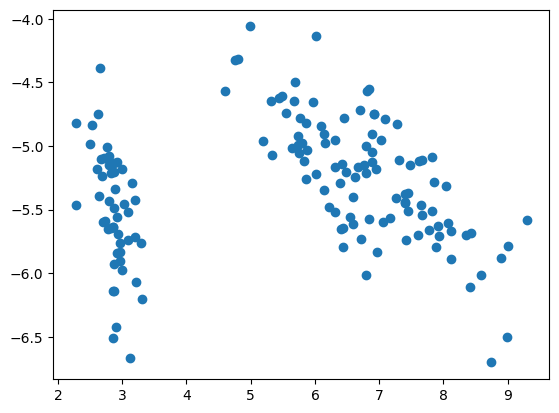

In [164]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(pca_score[:,0],pca_score[:,1])
plt.show()